<a href="https://colab.research.google.com/github/narmadhaprasanth/FirstFFNeuralNetwork/blob/master/FFNeuralNetwork_make_circles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score, log_loss, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.datasets import make_circles

In [14]:
help(make_circles)


Help on function make_circles in module sklearn.datasets.samples_generator:

make_circles(n_samples=100, shuffle=True, noise=None, random_state=None, factor=0.8)
    Make a large circle containing a smaller circle in 2d.
    
    A simple toy dataset to visualize clustering and classification
    algorithms.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int, optional (default=100)
        The total number of points generated. If odd, the inner circle will
        have one point more than the outer circle.
    
    shuffle : bool, optional (default=True)
        Whether to shuffle the samples.
    
    noise : double or None (default=None)
        Standard deviation of Gaussian noise added to the data.
    
    random_state : int, RandomState instance or None (default)
        Determines random number generation for dataset shuffling and noise.
        Pass an int for reproducible output across multiple function calls

In [15]:
data, labels = make_circles(n_samples=1000, noise=0.1, random_state=0, factor=0.6)
print(data.shape, labels.shape)
print(labels)

(1000, 2) (1000,)
[1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1
 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0
 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0
 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1
 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1
 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1
 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0
 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0
 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0
 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0
 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0
 1 0 0 

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",['red','yellow','green'])

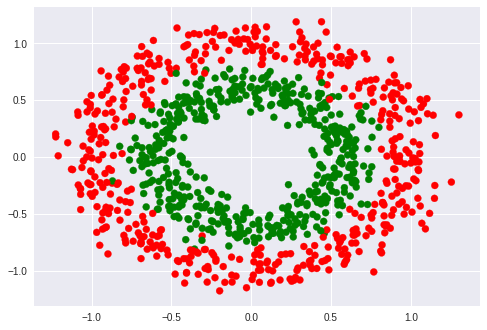

In [17]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [18]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, Y_train.shape)

(750, 2) (750,)


In [0]:
class FFMakeCircles:
  
  def __init__(self, n_inputs, n_outputs, hidden_layers=[4,4]):
    self.nx = n_inputs
    self.ny = n_outputs
    self.nh = len(hidden_layers)
    self.sizes = [self.nx] + hidden_layers + [self.ny]
    
    self.W = {}
    self.B = {}
    for i in range(self.nh+1):
      self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
      self.B[i+1] = np.zeros((1, self.sizes[i+1]))
      
  def forward_pass(self, x):
    self.A = {}
    self.H = {}
    self.H[0] = x.reshape(1,-1)
    for i in range(self.nh+1):
      self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]
      self.H[i+1] = self.sigmoid(self.A[i+1])
    return self.H[self.nh+1]
  
  def grad_sigmoid(self, x):
    return x*(1-x) 
    
  def grad(self, x, y):
    self.forward_pass(x)
    self.dW = {}
    self.dB = {}
    self.dH = {}
    self.dA = {}
    L = self.nh + 1
    self.dA[L] = (self.H[L] - y)
    for k in range(L, 0, -1):
      self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
      self.dB[k] = self.dA[k]
      self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
      self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1]))
    
  def sigmoid(self, x):
    return 1.0 / (1.0 + np.exp(-x))
    
  def fit(self, X, Y, epochs=1000, learning_rate=0.001, initialise=True, display_loss=True):
    
    if initialise:
      for i in range(self.nh+1):
        self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
        self.B[i+1] = np.zeros((1, self.sizes[i+1]))
        
    if display_loss:
      loss = {}
      
    for j in tqdm_notebook(range(epochs), total=epochs, unit='epoch'):
      dW = {}
      dB = {}
      for i in range(self.nh+1):
        dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
        dB[i+1] = np.zeros((1, self.sizes[i+1]))
      for x,y in zip(X, Y):
        self.grad(x, y)
        for i in range(self.nh+1):
          dW[i+1] += self.dW[i+1]
          dB[i+1] += self.dB[i+1]
      
      m = X.shape[1]
      for i in range(self.nh+1):
        self.W[i+1] -= learning_rate * dW[i+1] /m
        self.B[i+1] -= learning_rate * dB[i+1] /m
      
      if display_loss:
        Y_pred = self.predict(X)
        loss[j] = mean_squared_error(Y, Y_pred)
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel("Epochs")
      plt.ylabel("Mean Squared Error")
      plt.plot()
    
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred).squeeze()
  

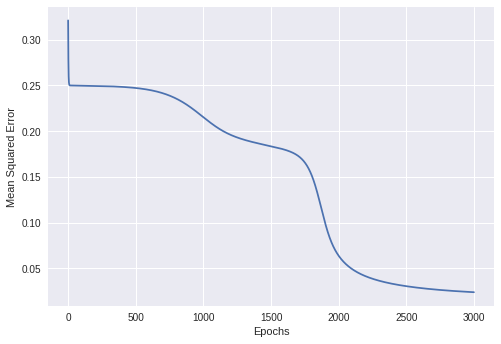

In [28]:
ffmc = FFMakeCircles(2, 1, [4,4])
ffmc.fit(X_train, Y_train, epochs=3000, learning_rate=0.001, initialise=True, display_loss=True)

In [29]:
Y_pred_train = ffmc.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype('int').ravel()
Y_pred_val = ffmc.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype('int').ravel()
accuracy_train = accuracy_score(Y_train, Y_pred_binarised_train)
accuracy_val = accuracy_score(Y_val, Y_pred_binarised_val)

print("Training Accuracy:", accuracy_train)
print("Validation Accuracy:", accuracy_val)

Training Accuracy: 0.968
Validation Accuracy: 0.972


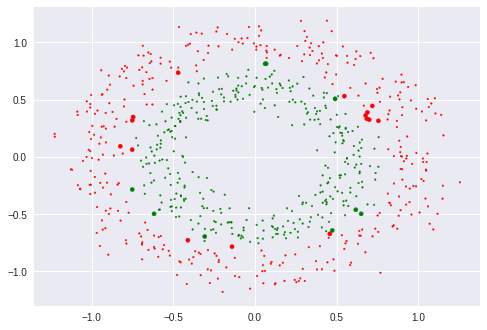

In [32]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap=my_cmap, s=15 *(np.abs(Y_train-Y_pred_binarised_train) +0.2))
plt.show()
 